<a href="https://colab.research.google.com/github/Ertthecoder/Audio-Denoiser-Noise-Cancelling/blob/main/AudioDenoiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Denoising / Noise Cancelling

In [ ]:
%load_ext autoreload
%autoreload 2
#%env CUDA_VISIBLE_DEVICES=3

## Downloading necessary assets

In [ ]:
colab_requirements = [
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

In [ ]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading and displaying the data

In [ ]:
dir = input("Please enter the directory of the sound file:")
rate, data = wavfile.read(dir)
data = data

Please enter the directory of the sound file:/content/drive/MyDrive/Colab Notebooks/Staj_Kybertech/audio_samples/denoiser_deneme.wav


In [ ]:
if data.ndim >= 2:
  
  data = data.flatten()
  rate = rate*2

In [ ]:
IPython.display.Audio(data = data, rate = rate)

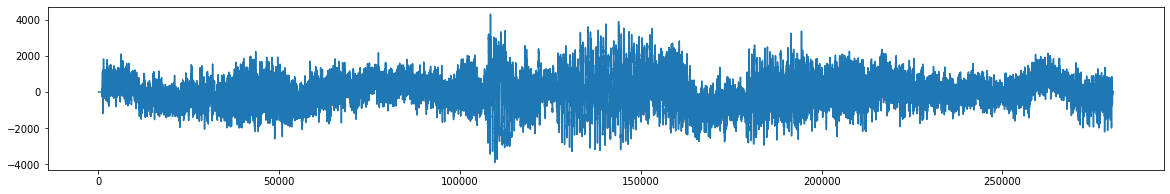

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

## Stationary Noise Reduction

In [ ]:
reduced_noise = nr.reduce_noise(y = data, sr = rate, n_std_thresh_stationary=1.5,stationary=True)

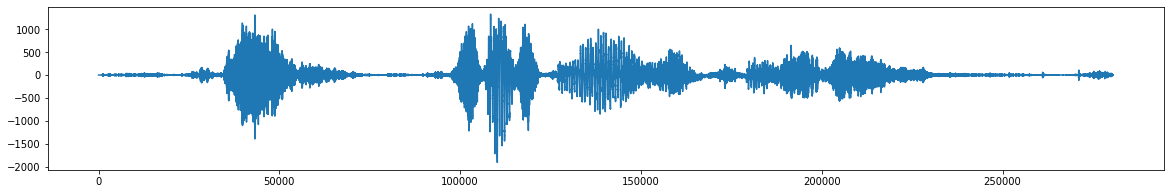

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [ ]:
IPython.display.Audio(data=reduced_noise, rate=rate)

## Non-Stationary Noise Reduction

In [ ]:
reduced_noise = nr.reduce_noise(y = data, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

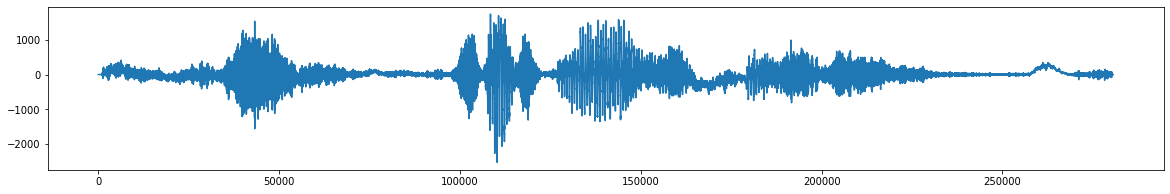

In [ ]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [ ]:
IPython.display.Audio(data=reduced_noise, rate=rate)